In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

## Public Salaries by Counties

Make all county names hyphenated and lowercase, and without the word "county."

In [2]:
def hyphenate(name):
    res = name.lower().split()
    if res[-1]=='county':
        res.pop()
    res = '-'.join(res)
    return res

import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
def clean(x):
    try:
        return locale.atof(x)/1000 #thousands of dollars
    except AttributeError:
        return float(x)/1000
    except ValueError:
        print('setting {} (type {})to 0'.format(x, type(x)))
        return 0.0
def drop_PT(df):
    res = df.loc[df['Base Pay']!=0.0]
    def notPT(x):
        try:
            return x!='PT'
        except Error:
            return True
    res = res.loc[res['Status'].map(notPT)]
    return res

In [3]:
df_index = pd.read_csv('counties.csv')
df_census = pd.read_csv('data/California_Median_Income_by_County.csv')

df_index['Counties'] = df_index['Counties'].map(hyphenate)
df_census['County'] = df_census['County'].map(hyphenate)

for attr in ['Median Income']:
    df_census[attr] = df_census[attr].map(clean)
    
attrs = ['Base Pay','Overtime Pay', 'Other Pay', 'Benefits', 'Total Pay', 'Total Pay & Benefits']

dfs=[]

for county in df_index['Counties']:
    try:
        x = pd.read_csv('data/{}-county-2016.csv'.format(county))
        x['Agency'] = x['Agency'].map(hyphenate)
        for attr in attrs:
            x[attr] = x[attr].map(clean)
        old_len = len(x)
        x = drop_PT(x)
        print('Dropped {} part-time employees.'.format(old_len-len(x)))
        dfs.append(x)
    except FileNotFoundError:
        continue

print(dfs[0][:5])
print('number of counties represented: ',len(dfs))
print('total number of entries: ',sum([len(df) for df in dfs]))

Dropped 2938 part-time employees.
Dropped 64 part-time employees.
Dropped 126 part-time employees.
Dropped 7 part-time employees.
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
Dropped 142 part-time employees.
Dropped 220 part-time employees.
Dropped 155 part-time employees.
Dropped 726 part-time employees.
Dropped 2159 part-time employees.
Dropped 183 part-time employees.
Dropped 882 part-time employees.
Dropped 603 part-time employees.
Dropped 201 part-time employees.
Dropped 4238 part-time employees.
Dropped 588 part-time employees.
Dropped 504 part-time employees.
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not 

/Users/ivan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


setting Aggregate (type <class 'str'>)to 0
Dropped 1899 part-time employees.
Dropped 0 part-time employees.
Dropped 1397 part-time employees.
Dropped 295 part-time employees.
Dropped 611 part-time employees.
Dropped 1591 part-time employees.
Dropped 0 part-time employees.
Dropped 110 part-time employees.
Dropped 3160 part-time employees.
Dropped 18 part-time employees.
Dropped 376 part-time employees.
Dropped 280 part-time employees.
Dropped 38 part-time employees.
Dropped 379 part-time employees.
Dropped 6540 part-time employees.
Dropped 3204 part-time employees.
Dropped 311 part-time employees.
Dropped 8229 part-time employees.
Dropped 5642 part-time employees.
Dropped 3235 part-time employees.
Dropped 1125 part-time employees.
Dropped 42 part-time employees.
Dropped 2803 part-time employees.
Dropped 6725 part-time employees.
Dropped 1598 part-time employees.
Dropped 861 part-time employees.
Dropped 60 part-time employees.
Dropped 341 part-time employees.
Dropped 42 part-time employe

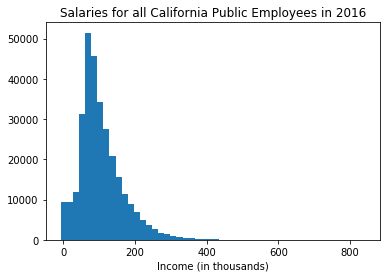

In [4]:
salary_to_plot = [df['Total Pay & Benefits'].as_matrix() for df in dfs]
salary_to_plot = np.concatenate(salary_to_plot)
n, bins, patches = plt.hist(salary_to_plot, 50, log=False)
plt.title('Salaries for all California Public Employees in 2016')
plt.xlabel('Income (in thousands)')
plt.show()

### Do public employees get paid less than private employees?

Average obtained from Census data.

Hypothesis: Public employees get paid less.

Method: Obtain median from Census data. Calculate multiple of median (e.g. making twice median). Plot aggregately for all counties.

Results: Majority of county employee individual incomes exceed median HOUSEHOLD income in the same county.

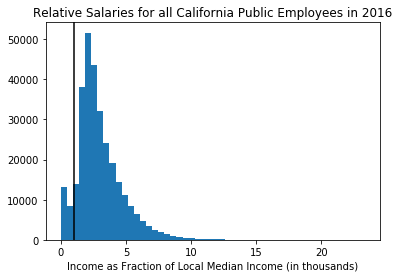

In [5]:
for df in dfs:
    county = df['Agency'].as_matrix()[0]
    census_median = df_census.loc[df_census['County'] == county]['Median Income'].as_matrix()[0]
    df['Frac Median'] = df['Total Pay & Benefits'].map(lambda x: x/census_median)
frac_to_plot = [df['Frac Median'].as_matrix() for df in dfs]
frac_to_plot = np.concatenate(frac_to_plot)

ranges = [(0,frac_to_plot.max())]
for range in ranges:
    n, bins, patches = plt.hist(frac_to_plot, 50, log=False, range=range)
    plt.title('Relative Salaries for all California Public Employees in 2016')
    if range[0]<1 and 1<range[1]:
        plt.axvline(x= 1, color='k')
    plt.xlabel('Income as Fraction of Local Median Income (in thousands)')
    plt.show()

#### Detalied plot for each county

In [6]:
# for df in dfs:
#     county = df['Agency'].as_matrix()[0]
#     census_median = df_census.loc[df_census['County'] == county]['Median Income'].as_matrix()[0]
#     x = df['Total Pay & Benefits'].as_matrix()
#     n, bins, patches = plt.hist(x, 50, log=False)
#     plt.axvline(x= census_median, color='k')
#     plt.title('Salaries for {}'.format(county))
#     plt.xlabel('County Employee Income (thousands)')
#     plt.show()

### Do public employees in highly-populated areas get paid more?

Hypothesis: Yes; many people feel that DMVs in cities are stressful places to work.

Result: Yes, but the median plateaus at around $95k.


In [7]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

df_popden = pd.read_csv('population_density.csv')
df_popden['County'] = df_popden['County'].map(hyphenate)
df_popden['Pop_Den'] = df_popden['Pop_Den'].map(locale.atof)
print(df_popden[:3])

    County  Pop_Den
0  alameda   2043.6
1   alpine      1.6
2   amador     64.1


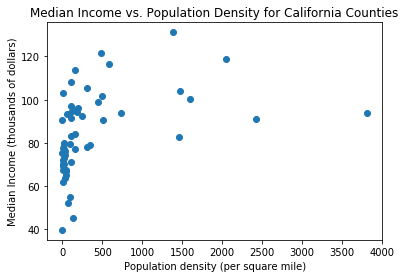

In [8]:
x = []
y = []
for df in dfs:
    pop_den=df_popden.loc[df_popden['County']==df['Agency'].as_matrix()[0]]['Pop_Den'].as_matrix()[0]
#     x.append(np.array([pop_den]*len(df)))
#     y.append(df['Total Pay & Benefits'].as_matrix())
    x.append([pop_den])
    y.append([df['Total Pay & Benefits'].median()])
x = np.concatenate(x)
y = np.concatenate(y)
plt.scatter(x, y)
plt.xlabel('Population density (per square mile)')
plt.ylabel('Median Income (thousands of dollars)')
plt.title('Median Income vs. Population Density for California Counties')
plt.show()

## UC vs. CSU: Read and clean data

In [9]:
df_uc = pd.read_csv("data/university-of-california-2016.csv")
df_csu = pd.read_csv("data/california-state-university-2016.csv")
dfs=[df_uc, df_csu]

attrs = ['Base Pay','Overtime Pay', 'Other Pay', 'Benefits', 'Total Pay', 'Total Pay & Benefits']

for attr in attrs:
    for df in dfs:
        df[attr] = df[attr].map(clean)
        
dfs = [drop_PT(dfs[0]), drop_PT(dfs[1])]

print(df_uc[:5])
print(df_csu[:5])

/Users/ivan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/ivan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Aggregate (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Aggregate (type <class 'str'>)to 0
setting Aggregate (type <class 'str'>)to 0
setting Aggregate (type <class 'str'>)to 0
setting Aggregate (type <class 'str'>)to 0
setting Aggregate (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
setting Not Provided (type <class 'str'>)to 0
settin

### Who pays better on average?

Result: UC

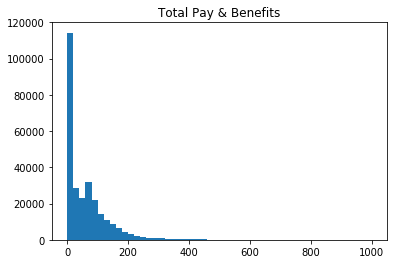

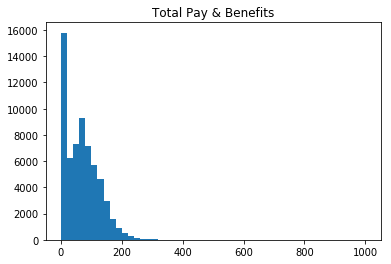

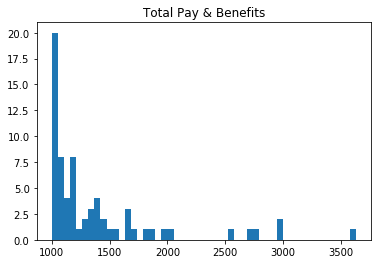

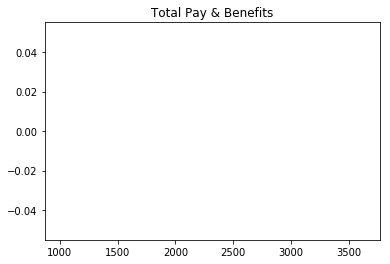

In [10]:
attr = 'Total Pay & Benefits'

x_max = max(dfs[0][attr].max(), dfs[1][attr].max())
divide = 1000 #7 figures
for range in [(0,divide), (divide, x_max)]:
    for df in dfs:
        x = df[attr]
        n, bins, patches = plt.hist(x, 50, range = range, log=False)
        plt.title(attr)
        plt.show()

### Who pays better for 10 most common job titles?

Result: hard to disaggregate data because "Job Title" doesn't line up

In [11]:
from collections import Counter

count = Counter(dfs[0]['Job Title'])
print(len(dfs[0]['Job Title']))
print(len(count))
common = count.most_common(10)
for job in common:
    mean0 = dfs[0].loc[dfs[0]['Job Title'] == job[0]]['Total Pay & Benefits'].mean()
    print(mean0)
    mean1 = dfs[1].loc[dfs[1]['Job Title'] == job[0]]['Total Pay & Benefits'].mean()
    print(mean1)
    print(job, "UC", (mean0-mean1)/np.mean(mean0+mean1)) if mean0>mean1 else print(job, "CSU", (mean1-mean0)/np.mean(mean0+mean1))
          

278616
3253
2.832090283864874
nan
('STDT 2', 14831) CSU nan
3.6075338285041862
nan
('STDT 4', 13598) CSU nan
13.150618363244472
nan
('TEACHG ASST-GSHIP', 13429) CSU nan
2.6730274777499456
nan
('STDT 1', 11573) CSU nan
3.614169387208984
nan
('STDT 3', 11211) CSU nan
130.41224106851996
nan
('CLIN NURSE 2', 9209) CSU nan
39.07559600429082
nan
('POSTDOC-EMPLOYEE', 7458) CSU nan
57.39537961307113
nan
('BLANK AST 3', 6151) CSU nan
19.9747893081761
nan
('GSR-FULL FEE REM', 4134) CSU nan
16.41529597197903
nan
('GSR-PARTIAL FEE REM', 3426) CSU nan


EDA: What are majority of job titles?

Result: work study, TAs, profs

In [12]:
for df in dfs:
    count = Counter(df['Job Title'])
    print('total:',len(df))
    print('frac 10 most common:', np.sum([x[1] for x in count.most_common(10)])/len(df))
    print('frac 20 most common:', np.sum([x[1] for x in count.most_common(20)])/len(df))
    print('frac 30 most common:', np.sum([x[1] for x in count.most_common(30)])/len(df))
    print(count.most_common(10))

total: 278616
frac 10 most common: 0.34104286903838976
frac 20 most common: 0.4250545553737043
frac 30 most common: 0.48015548281505727
[('STDT 2', 14831), ('STDT 4', 13598), ('TEACHG ASST-GSHIP', 13429), ('STDT 1', 11573), ('STDT 3', 11211), ('CLIN NURSE 2', 9209), ('POSTDOC-EMPLOYEE', 7458), ('BLANK AST 3', 6151), ('GSR-FULL FEE REM', 4134), ('GSR-PARTIAL FEE REM', 3426)]
total: 62816
frac 10 most common: 0.7037060621497707
frac 20 most common: 0.8006399643402955
frac 30 most common: 0.8430017829852267
[('LECTURER - ACADEMIC YEAR', 19032), ('INSTRUCTIONAL FACULTY - ACADEMIC YEAR', 10117), ('ADMINISTRATIVE ANALYST/SPECIALIST -12 MONTH', 3097), ('ADMINISTRATIVE SUPPORT COORDINATOR -12 MONTH', 2979), ('ADMINISTRATOR II', 1933), ('CUSTODIAN', 1568), ('ADMINISTRATIVE SUPPORT ASSISTANT -12 MONTH', 1538), ('CASUAL WORKER', 1352), ('STUDENT SERVICES PROFESSIONAL II', 1309), ('INFORMATION TECHNOLOGY CONSULTANT -12', 1279)]


Who works the most overtime?

Result: Nurse and Custodian

In [13]:
attr = 'Overtime Pay'

for df in dfs:
    d = {}
    common = Counter(df['Job Title']).most_common(10)
    for job in common:
        d[job[0]] = df.loc[df['Job Title'] == job[0]][attr].mean()
    res = max(d, key=lambda key: d[key])
    print(res, d[res])

CLIN NURSE 2 5.016988380931728
CUSTODIAN 0.6639277614795919
